In [294]:
import numpy as np
import matplotlib.pyplot as plt

In [295]:
def f(x):
    return 1

## Simple Iteration Method

In [296]:
a = 1 
dx = 0.02
dt = 0.0001
x_list = np.arange(0, 1+dx, dx)
if ((a*dt)/dx**2) <= 0.5:
    n = 0
    T = np.array([np.zeros(len(x_list))])
    for i in range(len(x_list)):
        T[n][i] = f(x_list[i]) #initial condition
    T[n][0] = 0 #left boundary condition
    T[n][-1] = 0 #right boundary condition
    
    e = 10**6
    while e > 10**(-4):
        T = np.append(T, [np.zeros(len(x_list))], axis=0)
        for i in range(1, len(x_list)-1):
            T[n+1][i] = T[n][i] + (((a*dt)/(dx**2)) * (T[n][i+1]-2*T[n][i]+T[n][i-1]))
        T[n+1][0] = 0
        T[n+1][-1] = 0
        e = max([abs(T[n+1][i] - T[n][i]) for i in range(len(x_list))]) #stopping criterion
        n += 1 
else:    
    print("Not stable conditions.")

Number of iterations for simple iteration method: 2565


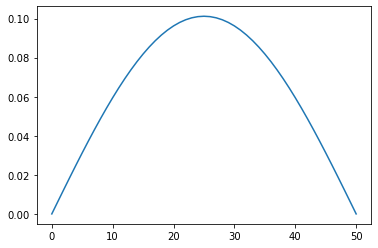

In [297]:
print(f'Number of iterations for simple iteration method: {n}')
fig, ax = plt.subplots()
ax.contourf(T)
fig.set_figwidth(8)
fig.set_figheight(5)
plt.show()

## Implicit method

In [270]:
a = 1 
dx = 0.02
dt = 0.0001
x_list = np.arange(0, 1+dx, dx)
length = len(x_list)

A = -a/dx**2
B = (1/dt) + ((2*a)/dx**2)
C = -a/dx**2

n = 0
T = np.array([np.zeros(length)])
for i in range(length):
    T[n][i] = f(x_list[i])
    
e = 10**6
while e > 10**(-4):

    alpha = np.zeros(length)
    alpha[1] = 0
    beta = np.zeros(length)
    beta[1] = 0

    T = np.append(T, [np.zeros(length)], axis=0)

    for i in range(1, length-1):
        alpha[i+1] = -A/(B+(C*alpha[i]))
        beta[i+1] = (T[n][i]/dt - C*beta[i])/(B+(C*alpha[i]))

    T[n+1][-1] = 0

    for i in range(length-2, -1, -1):
        T[n+1][i] = alpha[i+1]*T[n+1][i+1] + beta[i+1]

    e = max([abs(T[n+1][i] - T[n][i]) for i in range(length)])
    n += 1 

Number of iterations for implicit method: 2566


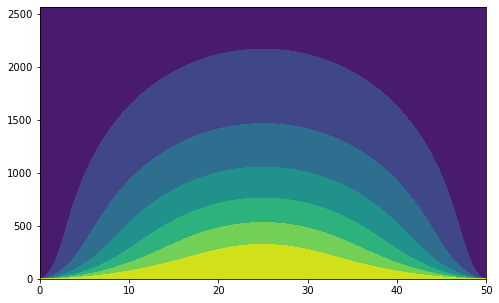

In [271]:
print(f'Number of iterations for implicit method: {n}')
fig, ax = plt.subplots()
ax.contourf(T)
fig.set_figwidth(8)
fig.set_figheight(5)
plt.show()

## Crank-Nicolson method

In [283]:
a = 1 
dx = 0.02
dt = 0.0001
x_list = np.arange(0, 1+dx, dx)
length = len(x_list)

A = -a/(2*dx**2)
B = (1/dt) + (a/dx**2)
C = -a/(2*dx**2)

n = 0
T = np.array([np.zeros(length)])
for i in range(length):
    T[n][i] = f(x_list[i])
    
e = 10**6
while e > 10**(-4):

    alpha = np.zeros(length)
    alpha[1] = 0
    beta = np.zeros(length)
    beta[1] = 0

    T = np.append(T, [np.zeros(length)], axis=0)

    for i in range(1, length-1):
        D = (T[n][i]/dt) + (a/(2*dx**2))*(T[n][i+1]-2*T[n][i]+T[n][i-1])
        alpha[i+1] = -A/(B+(C*alpha[i]))
        beta[i+1] = (D - C*beta[i])/(B+(C*alpha[i]))

    T[n+1][-1] = 0

    for i in range(length-2, -1, -1):
        T[n+1][i] = alpha[i+1]*T[n+1][i+1] + beta[i+1]

    e = max([abs(T[n+1][i] - T[n][i]) for i in range(length)])
    n += 1 

Number of iterations for Crank-Nicolson method: 2566


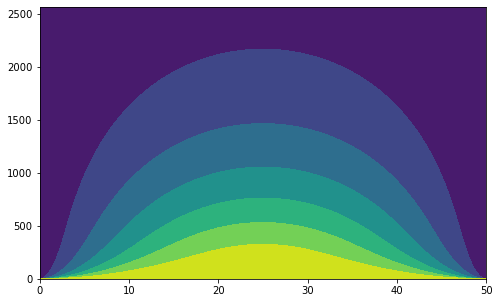

In [284]:
print(f'Number of iterations for Crank-Nicolson method: {n}')
fig, ax = plt.subplots()
ax.contourf(T)
fig.set_figwidth(8)
fig.set_figheight(5)
plt.show()

## Combined method B

In [287]:
a = 1 
dx = 0.02
dt = 0.0001
x_list = np.arange(0, 1+dx, dx)
length = len(x_list)

n = 0
T = np.array([np.zeros(length)])
for i in range(length):
    T[n][i] = f(x_list[i])

T[n][0] = 0
T[n][-1] = 0

# This scheme needs to have 2 time step to start. 
# Therefore I use the Simple Iteration Method to get the first time step. 
    
T = np.append(T, [np.zeros(len(x_list))], axis=0)
for i in range(1, len(x_list)-1):
    T[n+1][i] = T[n][i] + (((a*dt)/(dx**2)) * (T[n][i+1]-2*T[n][i]+T[n][i-1]))
T[n+1][0] = 0
T[n+1][-1] = 0

n += 1

In [288]:
# Thomas algorithm

A = -a/(dx**2)
B = (3/(2*dt)) + ((2*a)/dx**2)
C = -a/(dx**2)

e = 10**6
while e > 10**(-4):

    alpha = np.zeros(length)
    alpha[1] = 0
    beta = np.zeros(length)
    beta[1] = 0

    T = np.append(T, [np.zeros(length)], axis=0)

    for i in range(1, length-1):
        D = (2*T[n][i]/dt) - (T[n-1][i]/(2*dt))
        alpha[i+1] = -A/(B+(C*alpha[i]))
        beta[i+1] = (D - C*beta[i])/(B+(C*alpha[i]))

    T[n+1][-1] = 0

    for i in range(length-2, -1, -1):
        T[n+1][i] = alpha[i+1]*T[n+1][i+1] + beta[i+1]

    e = max([abs(T[n+1][i] - T[n][i]) for i in range(length)])
    n += 1 

Number of iterations for Combined Method B: 2566


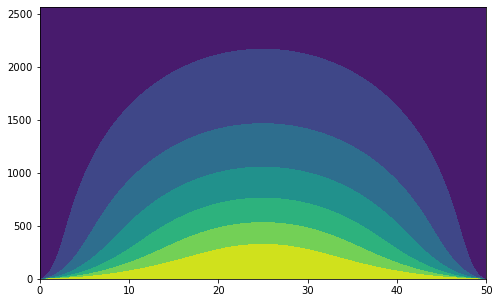

In [289]:
print(f'Number of iterations for Combined Method B: {n}')
fig, ax = plt.subplots()
ax.contourf(T)
fig.set_figwidth(8)
fig.set_figheight(5)
plt.show()

## Dufort-Frankel

In [292]:
a = 1 
dx = 0.02
dt = 0.0001
x_list = np.arange(0, 1+dx, dx)
length = len(x_list)

n = 0
T = np.array([np.zeros(length)])
for i in range(length):
    T[n][i] = f(x_list[i])

T[n][0] = 0
T[n][-1] = 0

# This scheme needs to have 2 time step to start. 
# Therefore I use the Simple Iteration Method to get the first time step. 
    
T = np.append(T, [np.zeros(len(x_list))], axis=0)
for i in range(1, len(x_list)-1):
    T[n+1][i] = T[n][i] + (((a*dt)/(dx**2)) * (T[n][i+1]-2*T[n][i]+T[n][i-1]))
T[n+1][0] = 0
T[n+1][-1] = 0

n += 1

e = 10**6
while e > 10**(-4):
    
    T = np.append(T, [np.zeros(length)], axis=0)

    for i in range(1, len(x_list)-1):
        T[n+1][i] = ((T[n-1][i]/(2*dt)) + ((a/(dx**2)) * (T[n][i+1]-T[n-1][i]+T[n][i-1]))) / ((1/(2*dt))+(a/dx**2))
        
    T[n+1][0] = 0
    T[n+1][-1] = 0
    e = max([abs(T[n+1][i] - T[n][i]) for i in range(len(x_list))])
    n += 1 

Number of iterations for Dufort-Frankel Method: 2974


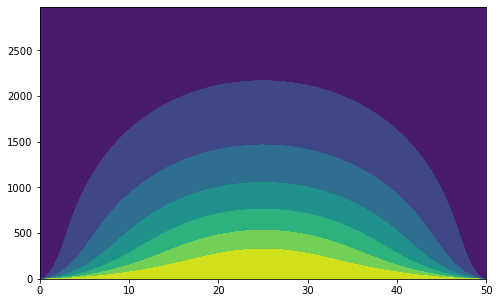

In [293]:
print(f'Number of iterations for Dufort-Frankel Method: {n}')
fig, ax = plt.subplots()
ax.contourf(T)
fig.set_figwidth(8)
fig.set_figheight(5)
plt.show()